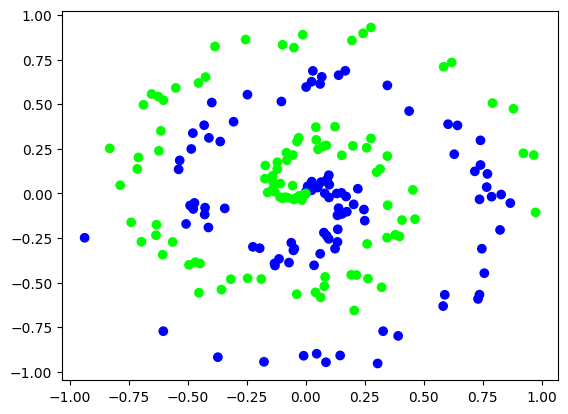

In [6]:
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
X, y = spiral_data( samples = 100 , classes = 2 )

plt.scatter(X[:, 0 ], X[:, 1 ], c = y )
plt.show()

In [7]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Epoch 1/1000
7/7 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5350
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.6000
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5950
Epoch 6/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.6000
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.6100
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5800
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5900
Epoch 10/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.6050
Epoch 11/1000
7/7 [

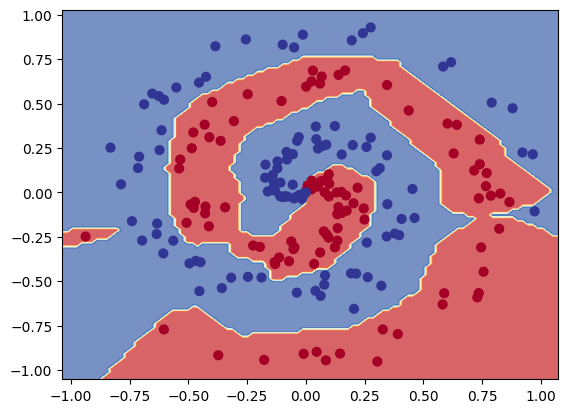

In [14]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model_2.fit(X, y, epochs=1000)

# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_2, X, y)

# 99.5 % Accuracy